# Telco Customer Churn



### Main objective:
Goal is to predict the behavior of customers to retain current customers and avoid making them churn


### Description of the data set:
Here we use data from [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) that studies informations about customers including the following parameters:

1. CustomerID: A unique ID that identifies each customer.

2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

3. Gender: The customer’s gender: Male, Female

4. Age: The customer’s current age, in years, at the time the fiscal quarter ended.

5. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

6. Married: Indicates if the customer is married: Yes, No

7. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

8. Number of Dependents: Indicates the number of dependents that live with the customer.

9. partner: Whether the customer has a partner or not (Yes, No)

10. Tenure in Months: Indicates the total amount of months that the customer has been with the company

11. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

12. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

13. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

14. Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.

15. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

16. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

17. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

18. Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

19. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

20. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

21. Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.

22. Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No

23. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

24. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

24. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

26. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

27. Total Charges: Indicates the customer’s total charges.

28. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company.






### Plan for data exploration:
1. cleaning data 
    * removing unimportant data 
    * dealing with missing (NaN) values if found.
2. feature engineering 
    * visualizing the data and see the data distribution 
    * deal with skewed distribution if found
3. Variable Selection
    * encoding for categorical variables
    * feature scalling for continuous variables
4. Spliting the Data & implementing Cross Validation
    * Train-Test split
    * 
5. linear regression model
    * Linear regression
    * regulation using Ridge and Lasso


In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

%matplotlib inline

# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df = df.drop(columns='customerID')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# removing inconsistences in the data
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

### Exploratory data analysis & Cleaning

In [7]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')

In [9]:
len(df[df.totalcharges.isnull()]['totalcharges']) #number of null values in totalcharges column

11

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
num_missing = df.isnull().sum()
percentage_missing = df.isnull().sum().apply(lambda x: x/df.shape[0]*100)
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)
#lokking for missing data and if found we will drop features with precentage >20%

gender              0.0
seniorcitizen       0.0
totalcharges        0.0
monthlycharges      0.0
paymentmethod       0.0
paperlessbilling    0.0
contract            0.0
streamingmovies     0.0
streamingtv         0.0
techsupport         0.0
deviceprotection    0.0
onlinebackup        0.0
onlinesecurity      0.0
internetservice     0.0
multiplelines       0.0
phoneservice        0.0
tenure              0.0
dependents          0.0
partner             0.0
churn               0.0
Name: Percentage of Missing, dtype: float64

In [12]:
#target variable is categorical so we will convert it to numerical
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [13]:
df.churn.value_counts()


0    5174
1    1869
Name: churn, dtype: int64

In [14]:
categorical_col = df.columns[df.dtypes == object]
numerical = (df.columns[df.dtypes != 'object']).tolist()
del(numerical[-1])

In [15]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in categorical_col],
             columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


There is no feature that has too many unique values so we won't Drop any columns

In [17]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
categorical_variables = list(df_uniques[(df_uniques['Unique Values'] > 2)].index)

### Feature importance analysis

In [21]:
global_mean = df.churn.mean()
global_mean

0.2653698707936959

In [22]:
# mutual information (measuring the degree of dependency for categorical variables)
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series,df.churn)

df_mi = df[categorical_col].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='Mutual Information')
df_mi

,Mutual Information
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


In [23]:
# corelation coefficient (measuring the degree of dependency for numerical variables[positive correlation / negative correlation])
df[numerical].corrwith(df.churn).to_frame(name='Corelation Coefficient')


,Corelation Coefficient
seniorcitizen,0.150889
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.198324


### Feature Engineering 
#### (one hot encoding)

In [27]:
lb, le = LabelBinarizer(), LabelEncoder()

#encoding ordinary variables
for col in categorical_variables:
    df[col] = le.fit_transform(df[col])

# binary encoding binary variables
for col in binary_variables:
    df[col] = lb.fit_transform(df[col])

### Apply Feature Scaling

In [29]:
mm = MinMaxScaler()
for column in [categorical_variables + numerical]:
    df[column] = mm.fit_transform(df[column])

# Save a copy of the processed data for later use
outputfile = 'Telco-Customer-Churn_processed.csv'
df.to_csv(outputfile, index=False)

### Data Spliting

In [30]:
feature_cols = list(df.columns)
feature_cols.remove('churn')
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.churn))

# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'churn']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'churn']

### Train models

* Standard logistic regression, K-nearest neighbors algorithm, Decision Tree,mRandom Forest
* Plot the results using heatmaps
* Compare scores: precision, recall, accuracy, F1 score, auc

### Logistic regression

In [63]:
# create dataframe for metrics
metrics = pd.DataFrame()

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_lr,
                                                                    average='weighted'))[:-2])
# adding lr stats to metrics DataFrame
lr_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':round(accuracy_score(y_test, y_pred_lr), 2),
                      'f1score':round(f1_score(y_test, y_pred_lr), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_lr),2)},
                     name='Logistic Regression')
# Report outcomes
print(pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:3])
lr_stats

                  0         1  accuracy
precision  0.847095  0.650628   0.80265
recall     0.892397  0.554367   0.80265
f1-score   0.869156  0.598653   0.80265


precision    0.79
recall       0.80
accuracy     0.80
f1score      0.60
auc          0.72
Name: Logistic Regression, dtype: float64

### K-nearest Neighbors

In [69]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

precision_knn, recall_knn = (round(float(x),2) for x in list(score(y_test,
                                                                      y_pred_knn,
                                                                      average='weighted'))[:-2])
# adding KNN stats to metrics DataFrame
knn_stats = pd.Series({'precision':precision_knn,
                      'recall':recall_knn,
                      'accuracy':round(accuracy_score(y_test, y_pred_knn), 2),
                      'f1score':round(f1_score(y_test, y_pred_knn), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_knn),2)}, name='KNN')
# Report outcomes
print(pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:3])
knn_stats

                  0         1  accuracy
precision  0.817183  0.492035  0.730241
recall     0.815077  0.495544  0.730241
f1-score   0.816129  0.493783  0.730241


precision    0.73
recall       0.73
accuracy     0.73
f1score      0.49
auc          0.66
Name: KNN, dtype: float64

### Decision Tree

In [71]:
dt = DecisionTreeClassifier(random_state=42,max_depth=5,max_features=10)
dt = dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

precision_dt, recall_dt = (round(float(x),2) for x in list(score(y_test,
                                                                y_pred_dt,
                                                                average='weighted'))[:-2])
# adding dt stats to metrics DataFrame
dt_stats = pd.Series({'precision':precision_dt,
                      'recall':recall_dt,
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')
# Report outcomes
print(pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2])
dt_stats

                  0         1
precision  0.827273  0.596112
recall     0.879510  0.491979
f1-score   0.852592  0.539062


precision    0.77
recall       0.78
accuracy     0.78
f1score      0.54
auc          0.69
Name: Decision Tree, dtype: float64

### Random forest

In [74]:
# Initialize the random forest estimator
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

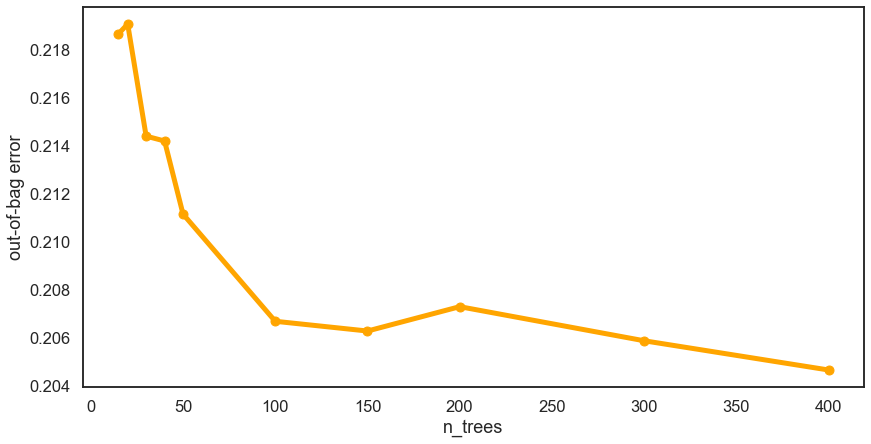

In [75]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', color="orange", figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

The error looks like it has stabilized around 100-150 trees.



In [76]:
rf = RF.set_params(n_estimators=100)

y_pred_rf = rf.predict(X_test)
precision_rf, recall_rf = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_rf,
                                                                    average='weighted'))[:-2])
rf_stats = pd.Series({'precision':precision_rf,
                      'recall':recall_rf,
                      'accuracy':round(accuracy_score(y_test, y_pred_rf), 2),
                      'f1score':round(f1_score(y_test, y_pred_rf), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_rf),2)}, name='Random Forest')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3,:2]

,0,1
precision,0.828247,0.619910
recall,0.891753,0.488414
f1-score,0.858827,0.546361


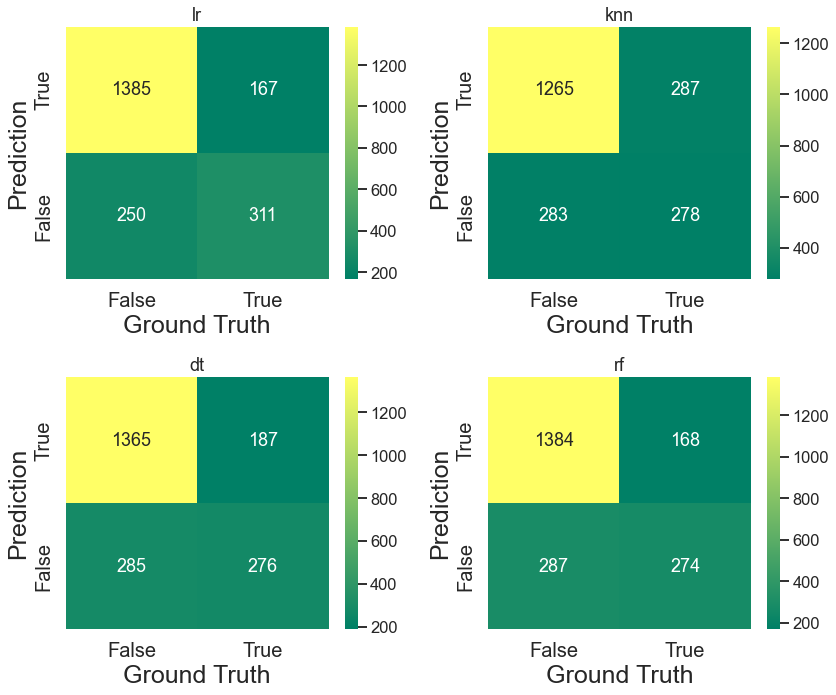

In [81]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['lr', 'knn', 'dt', 'rf']
cm = [confusion_matrix(y_test, y_pred_lr),
      confusion_matrix(y_test, y_pred_knn),
      confusion_matrix(y_test, y_pred_dt),
      confusion_matrix(y_test, y_pred_rf)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer');
    ax.set(title=model);
    ax.set_xticklabels(labels, fontsize=20);
    ax.set_yticklabels(labels[::-1], fontsize=20);
    ax.set_ylabel('Prediction', fontsize=25);
    ax.set_xlabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

# Results

The classsification report of each classifier shows that I am able to predict consistent classification, with an F1 score of 0.60 for Logistic Regression model. Similar result can be achieved using any of the model above.

In [83]:
metrics.append([lr_stats, knn_stats, dt_stats, rf_stats])

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.79,0.80,0.80,0.60,0.72
KNN,0.73,0.73,0.73,0.49,0.66
Decision Tree,0.77,0.78,0.78,0.54,0.69
Random Forest,0.77,0.78,0.78,0.55,0.69


# Next Steps

We could further optimize these models by using GridSearchCV or Boosting algorithms. It takes a significant amount of time when training AdaBoostClassifier so we might need to limit the amount of training data.